# Set up

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import random
random.seed(1337)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import *


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [13]:
path = os.path.join(os.getcwd(),  'TaroDataset')
print(path)

/content/drive/My Drive/TaroDataset


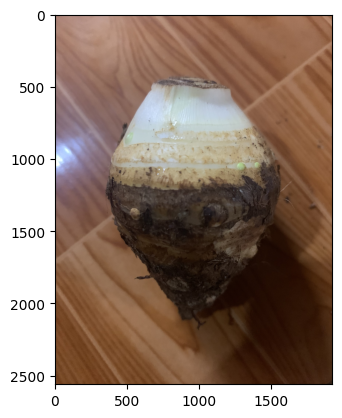

In [14]:
img = PIL.Image.open(os.path.join(path, 'train', 'HealthyTaro', 'HealthyTaro_0.jpg'))
plt.imshow(img)

In [15]:
# config
batch_size = 32
img_height = 224
img_width = 224

# Test 1:

## Augumentation:


In [16]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    os.path.join(path, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=1337)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(
    os.path.join(path, 'validation'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=1337)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest')
test_generator = test_datagen.flow_from_directory(
    os.path.join(path, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=1337)


Found 429 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [17]:
train_generator.class_indices

{'HealthyTaro': 0, 'UnhealthyTaro': 1}

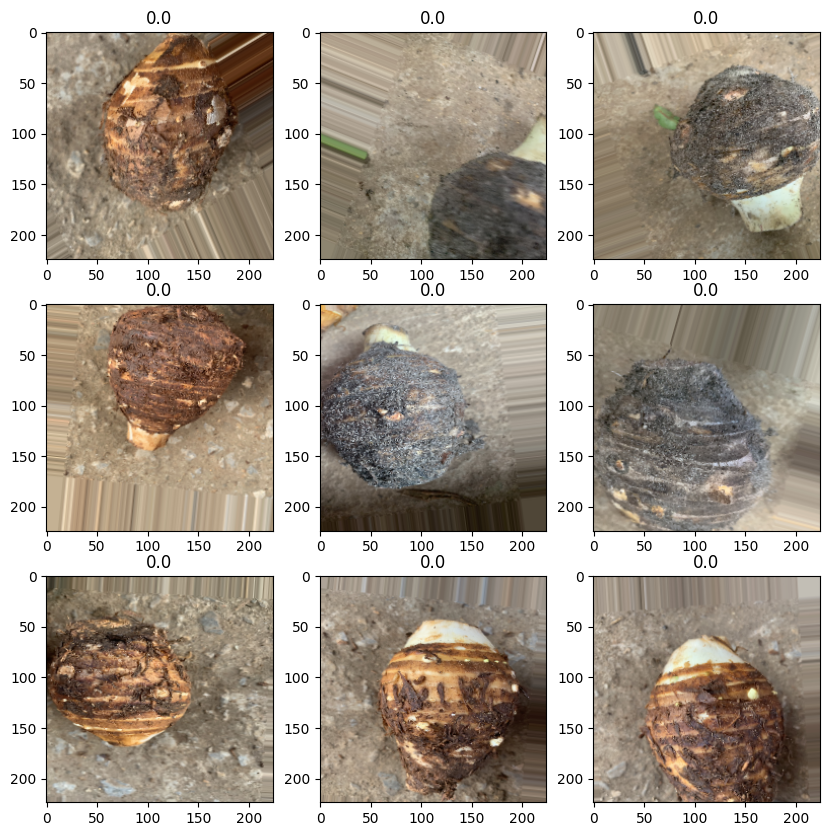

In [18]:
plt.figure(figsize=(10, 10))
x, y = train_generator.next()
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x[i])
    plt.title(y[i])

plt.show()

In [19]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 224, 224, 3)
(32,)


In [20]:
num_classes = len(train_generator.class_indices)
print(num_classes)

2


## Model Training:

In [21]:
model = Sequential([
  layers.InputLayer(input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation = 'sigmoid')
])

In [22]:
model.compile(optimizer= keras.optimizers.Adam(),
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics= ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [24]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [25]:
import time
epochs = 100
current_time = int(time.time())
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
  callbacks=[earlystopper]
)
training_time = int(time.time()-current_time)
print('Training time: {} seconds'.format(training_time))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 [==============================] - 168s 11s/step - loss: 0.7293 - accuracy: 0.6970 - val_loss: 0.5552 - val_accuracy: 0.7833
Epoch 2/100
14/14 [==============================] - 26s 2s/step - loss: 0.5556 - accuracy: 0.7646 - val_loss: 0.5096 - val_accuracy: 0.7833
Epoch 3/100
14/14 [==============================] - 23s 2s/step - loss: 0.5566 - accuracy: 0.7646 - val_loss: 0.5152 - val_accuracy: 0.7833
Epoch 4/100
14/14 [==============================] - 23s 2s/step - loss: 0.5188 - accuracy: 0.7622 - val_loss: 0.4642 - val_accuracy: 0.8000
Epoch 5/100
14/14 [==============================] - 25s 2s/step - loss: 0.4729 - accuracy: 0.7972 - val_loss: 0.4158 - val_accuracy: 0.7917
Epoch 6/100
14/14 [==============================] - 23s 2s/step - loss: 0.4232 - accuracy: 0.8019 - val_loss: 0.3493 - val_accuracy: 0.8750
Epoch 7/100
14/14 [==============================] - 23s 2s/step - loss: 0.3187 - accuracy: 0.8508 - val_loss: 0.2562 - val_accuracy: 0.8750
Epoch 8/100
14/14 [====

## Evaluation and predict

In [26]:
# save model
model.save('test1_cnn.h5')
from google.colab import files
files.download('test1_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

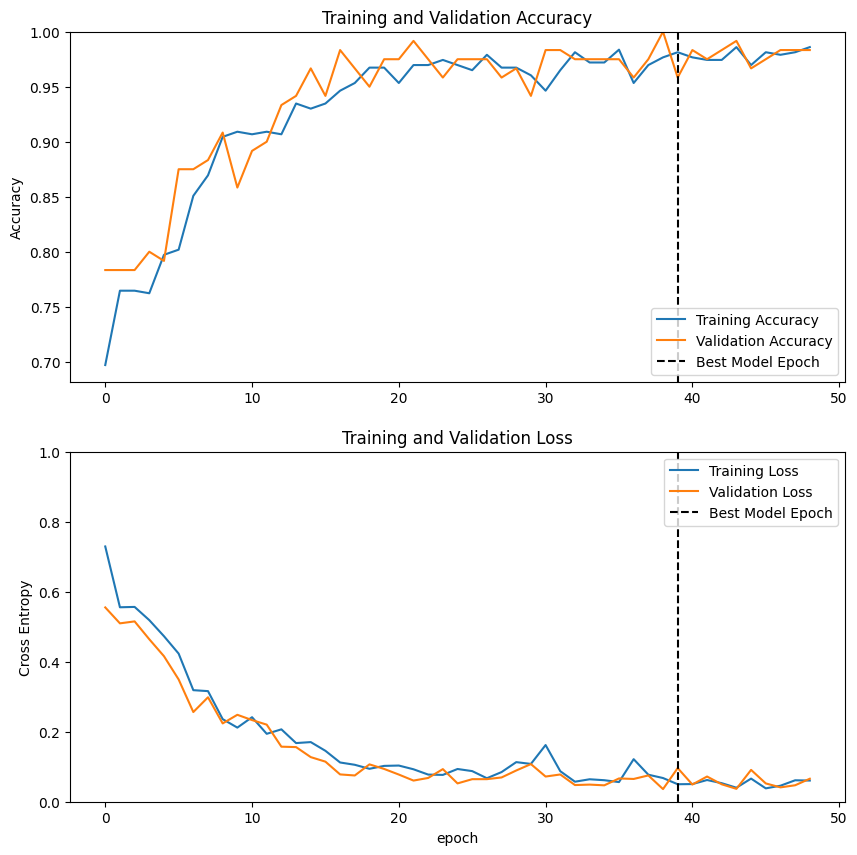

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

best_epoch = np.argmin(np.array(val_loss))+1
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(x=best_epoch, color='k', linestyle='--', label='Best Model Epoch')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(x=best_epoch, color='k', linestyle='--', label='Best Model Epoch')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [28]:
model.evaluate(test_generator)

4/4 [==============================] - 49s 16s/step - loss: 0.0680 - accuracy: 0.9677


[0.06802531331777573, 0.9677419066429138]

In [67]:
# predict test data
img = tf.keras.preprocessing.image.load_img(
    os.path.join(path, 'test', 'HealthyTaro', 'HealthyTaro_2.jpg'), target_size=(img_height, img_width),
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array /= 255.
print(img_array)

predictions = model.predict(img_array)
print(predictions)

#print(
#    "This image most likely belongs to {} with a {:.2f} percent confidence."
#    .format(train_generator.class_indices, 100 * np.max(score))
#)

tf.Tensor(
[[[[0.6431373  0.60784316 0.61960787]
   [0.6313726  0.59607846 0.60784316]
   [0.6431373  0.60784316 0.61960787]
   ...
   [0.24705882 0.2        0.2       ]
   [0.23529412 0.21960784 0.20784314]
   [0.23921569 0.24705882 0.23529412]]

  [[0.6431373  0.60784316 0.6117647 ]
   [0.6509804  0.6156863  0.61960787]
   [0.627451   0.5921569  0.6039216 ]
   ...
   [0.2784314  0.2627451  0.2509804 ]
   [0.25490198 0.23921569 0.23529412]
   [0.28235295 0.2901961  0.28627452]]

  [[0.627451   0.5921569  0.59607846]
   [0.6431373  0.60784316 0.6117647 ]
   [0.64705884 0.6117647  0.62352943]
   ...
   [0.21176471 0.20392157 0.21568628]
   [0.18431373 0.18431373 0.18431373]
   [0.37254903 0.3764706  0.38431373]]

  ...

  [[0.6627451  0.6431373  0.5686275 ]
   [0.7058824  0.6862745  0.6117647 ]
   [0.6156863  0.5529412  0.4509804 ]
   ...
   [0.2627451  0.18039216 0.07450981]
   [0.32156864 0.24313726 0.14901961]
   [0.30588236 0.22745098 0.12941177]]

  [[0.68235296 0.65882355 0.611764

# Test 2:

## Augumentation:

In [33]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.4,1.5],
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.3,
    shear_range=0.1,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    os.path.join(path, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=1337)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.4,1.5],
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.3,
    shear_range=0.1,
    fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(
    os.path.join(path, 'validation'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=1337)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(path, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 429 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [34]:
train_generator.class_indices

{'HealthyTaro': 0, 'UnhealthyTaro': 1}

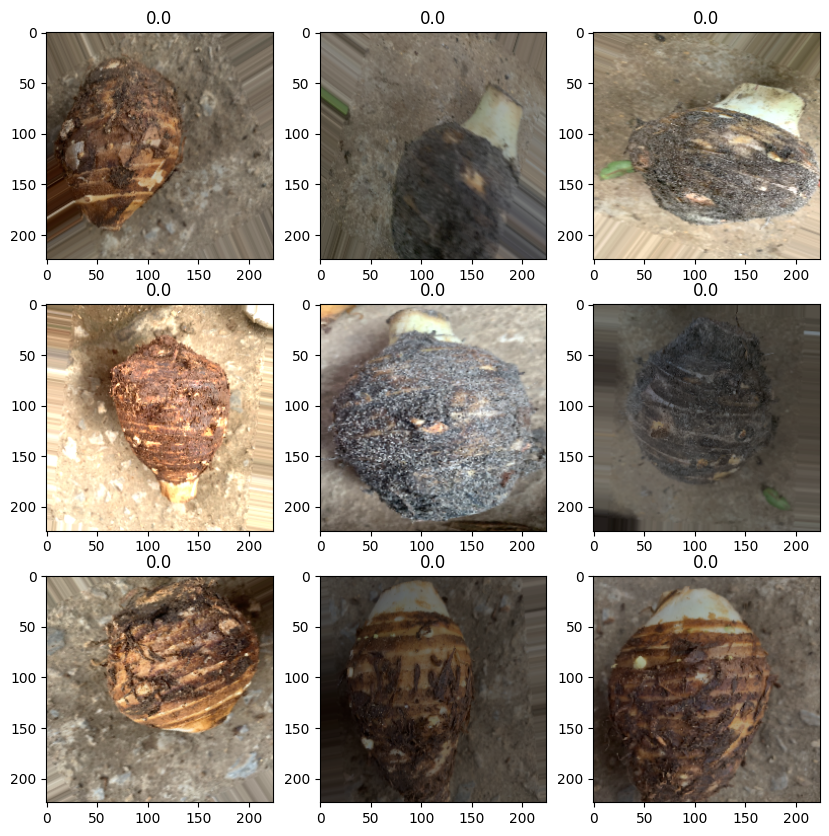

In [35]:
plt.figure(figsize=(10, 10))
x, y = train_generator.next()
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x[i])
    plt.title(y[i])

plt.show()

In [36]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [37]:
num_classes = len(train_generator.class_indices)
print(num_classes)

2


## Model Training:

In [38]:
num_classes

2

In [39]:
'''
model = Sequential([
  layers.InputLayer(input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer= keras.optimizers.Adam(learning_rate = 5e-5),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics= ['accuracy'])
model.summary()
'''

"\nmodel = Sequential([\n  layers.InputLayer(input_shape=(img_height, img_width, 3)),\n  layers.Conv2D(64, 3, activation='relu'),\n  layers.MaxPooling2D(2,2),\n  layers.Conv2D(64, 3, activation='relu'),\n  layers.MaxPooling2D(2,2),\n  layers.Conv2D(128, 3, activation='relu'),\n  layers.MaxPooling2D(2,2),\n  layers.Conv2D(128, 3, activation='relu'),\n  layers.MaxPooling2D(2,2),\n  layers.Conv2D(256, 3, activation='relu'),\n  layers.MaxPooling2D(2,2),\n  layers.Conv2D(256, 3, activation='relu'),\n  layers.MaxPooling2D(2,2),\n  layers.Flatten(),\n  layers.Dense(512, activation='relu'),\n  layers.Dropout(0.2),\n  layers.Dense(512, activation='relu'),\n  layers.Dropout(0.2),\n  layers.Dense(64, activation='relu'),\n  layers.Dropout(0.2),\n  layers.Dense(1, activation = 'sigmoid')\n])\n\nmodel.compile(optimizer= keras.optimizers.Adam(learning_rate = 5e-5),\n              loss= tf.keras.losses.BinaryCrossentropy(),\n              metrics= ['accuracy'])\nmodel.summary()\n"

In [40]:
model = Sequential([
  layers.InputLayer(input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(2, activation = 'sigmoid')
])

model.compile(optimizer= keras.optimizers.Adam(learning_rate = 5e-5),
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [41]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [42]:
import time
epochs = 100
current_time = int(time.time())
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
  batch_size = 32,
  callbacks=[earlystopper]
)
training_time = int(time.time() - current_time)
print('Training time: {} seconds'.format(training_time))

Epoch 1/100
14/14 [==============================] - 33s 2s/step - loss: 0.5894 - accuracy: 0.7483 - val_loss: 0.5417 - val_accuracy: 0.7833
Epoch 2/100
14/14 [==============================] - 26s 2s/step - loss: 0.5820 - accuracy: 0.7622 - val_loss: 0.5280 - val_accuracy: 0.7833
Epoch 3/100
14/14 [==============================] - 25s 2s/step - loss: 0.5514 - accuracy: 0.7599 - val_loss: 0.4962 - val_accuracy: 0.7833
Epoch 4/100
14/14 [==============================] - 26s 2s/step - loss: 0.5599 - accuracy: 0.7599 - val_loss: 0.5074 - val_accuracy: 0.7833
Epoch 5/100
14/14 [==============================] - 29s 2s/step - loss: 0.5502 - accuracy: 0.7622 - val_loss: 0.5098 - val_accuracy: 0.7833
Epoch 6/100
14/14 [==============================] - 25s 2s/step - loss: 0.5396 - accuracy: 0.7646 - val_loss: 0.4630 - val_accuracy: 0.7833
Epoch 7/100
14/14 [==============================] - 27s 2s/step - loss: 0.5290 - accuracy: 0.7599 - val_loss: 0.4956 - val_accuracy: 0.7833
Epoch 8/100
1

## Evaluation

In [43]:
model.save('test2_cnn.h5')
#from google.colab import files
#files.download('test2_cnn.h5')

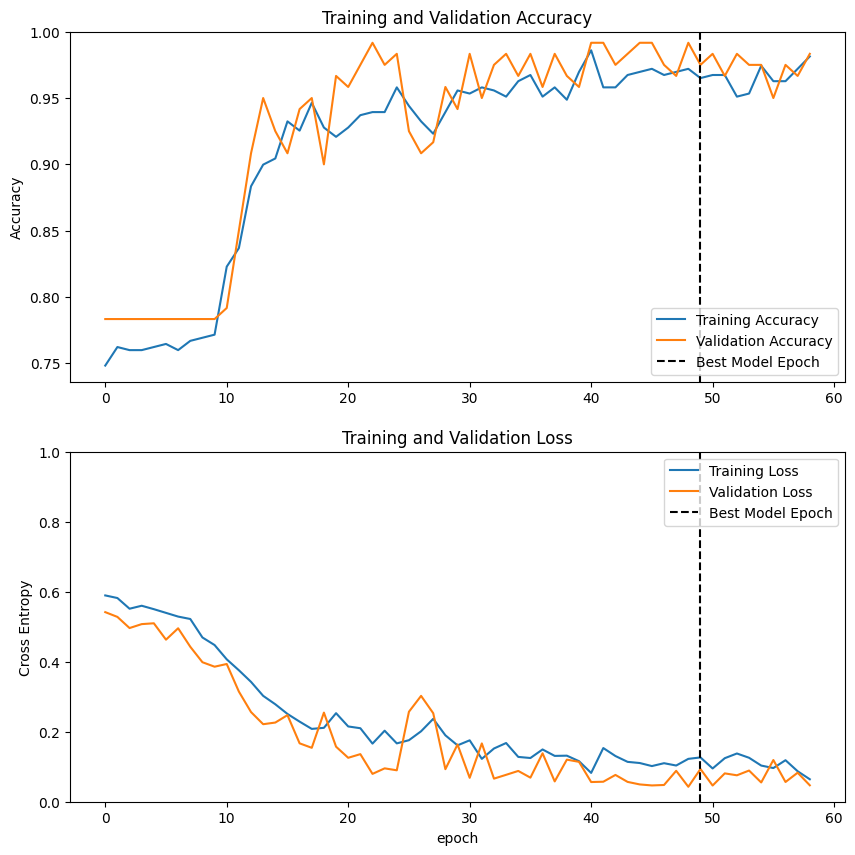

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

best_epoch = np.argmin(np.array(val_loss))+1
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(x=best_epoch, color='k', linestyle='--', label='Best Model Epoch')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(x=best_epoch, color='k', linestyle='--', label='Best Model Epoch')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [45]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

4/4 - 4s - loss: 0.1649 - accuracy: 0.9355 - 4s/epoch - 1s/step


In [47]:
predicted_labels, true_labels

(array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0.], dtype=float32))

# Test 3: Tranfer learning

## Augumentation:

In [49]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.4,1.5],
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.3,
    shear_range=0.1,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    os.path.join(path, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=1337)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.4,1.5],
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.3,
    shear_range=0.1,
    fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(
    os.path.join(path, 'validation'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=1337)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(path, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 429 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [50]:
train_generator.class_indices

{'HealthyTaro': 0, 'UnhealthyTaro': 1}

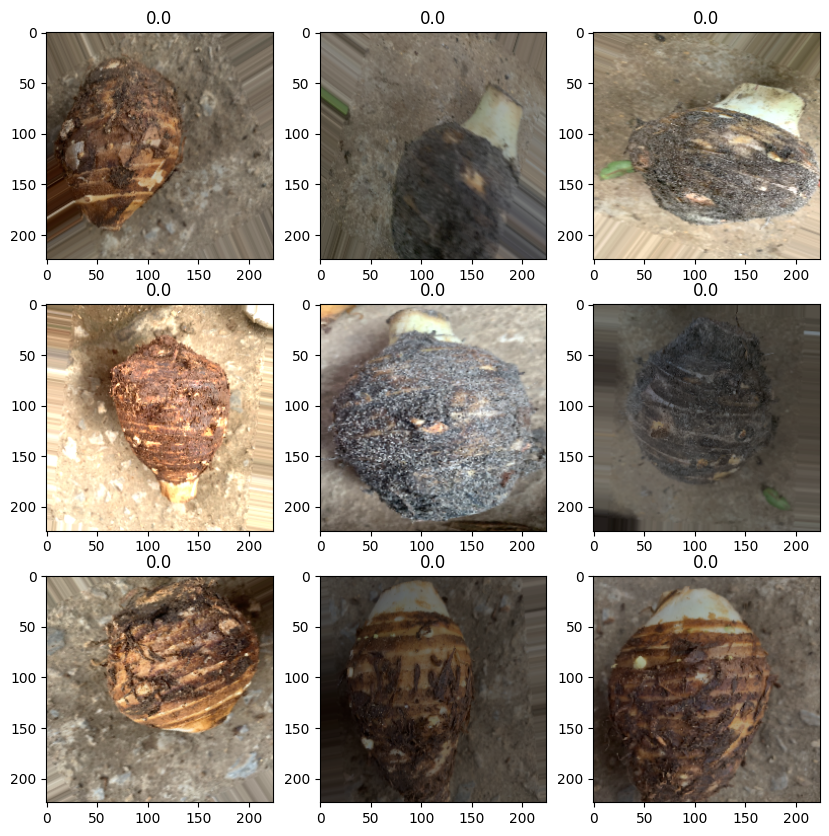

In [51]:
plt.figure(figsize=(10, 10))
x, y = train_generator.next()
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x[i])
    plt.title(y[i])

plt.show()

In [52]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [53]:
num_classes = len(train_generator.class_indices)
print(num_classes)

2


## Training

In [54]:
model = Sequential([
    tf.keras.applications.EfficientNetV2S(
        input_shape=(img_height, img_width, 3),
        include_top=False,
        weights='imagenet',
        classifier_activation="sigmoid",
        classes=2),
    # flatten
    layers.Flatten(),
    # 512 neuron hidden layer
    layers.Dense(512, activation='relu'),
    layers.Dropout(0,5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0,5),
    # output layer
    layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer= keras.optimizers.Adam(learning_rate = 1e-4),
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])
model.summary()

82420632/82420632 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 7, 7, 1280)        20331360  
 al)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               32113152  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               

In [55]:
tf.config.run_functions_eagerly(True)

In [56]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

import time
epochs = 100
current_time = int(time.time())
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
  batch_size = 32,
  callbacks=[earlystopper]
)
training_time = int(time.time() - current_time)
print('Training time: {} seconds'.format(training_time))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


14/14 [==============================] - 57s 4s/step - loss: 0.4088 - accuracy: 0.8298 - val_loss: 1.4355 - val_accuracy: 0.2667
Epoch 2/100
14/14 [==============================] - 47s 3s/step - loss: 0.1191 - accuracy: 0.9510 - val_loss: 1.4782 - val_accuracy: 0.2667
Epoch 3/100
14/14 [==============================] - 49s 3s/step - loss: 0.0878 - accuracy: 0.9697 - val_loss: 0.7308 - val_accuracy: 0.5917
Epoch 4/100
14/14 [==============================] - 51s 4s/step - loss: 0.0816 - accuracy: 0.9674 - val_loss: 0.4740 - val_accuracy: 0.8167
Epoch 5/100
14/14 [==============================] - 49s 3s/step - loss: 0.0732 - accuracy: 0.9837 - val_loss: 0.2414 - val_accuracy: 0.9583
Epoch 6/100
14/14 [==============================] - 48s 3s/step - loss: 0.0449 - accuracy: 0.9837 - val_loss: 0.0381 - val_accuracy: 0.9917
Epoch 7/100
14/14 [==============================] - 52s 4s/step - loss: 0.0205 - accuracy: 0.9953 - val_loss: 0.0952 - val_accuracy: 0.9667
Epoch 8/100
14/14 [======

In [57]:
model.save('transfer_learning1.h5')

## Evaluation

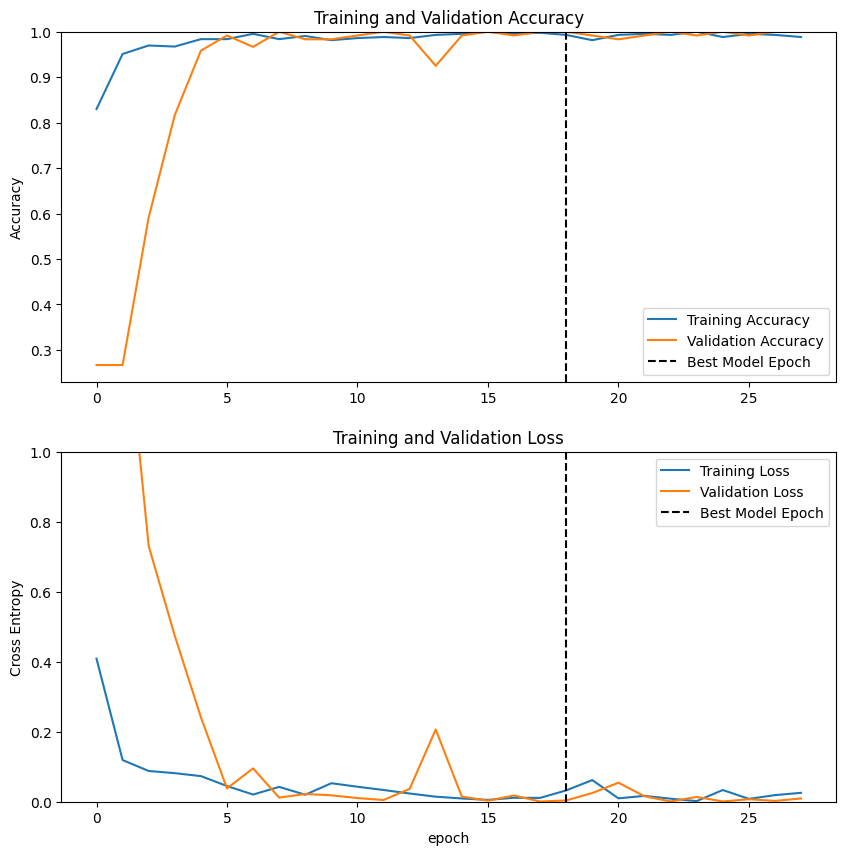

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

best_epoch = np.argmin(np.array(val_loss))+1
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(x=best_epoch, color='k', linestyle='--', label='Best Model Epoch')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(x=best_epoch, color='k', linestyle='--', label='Best Model Epoch')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [59]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

4/4 - 7s - loss: 0.1133 - accuracy: 0.9758 - 7s/epoch - 2s/step


1/1 [==============================] - 0s 399ms/step


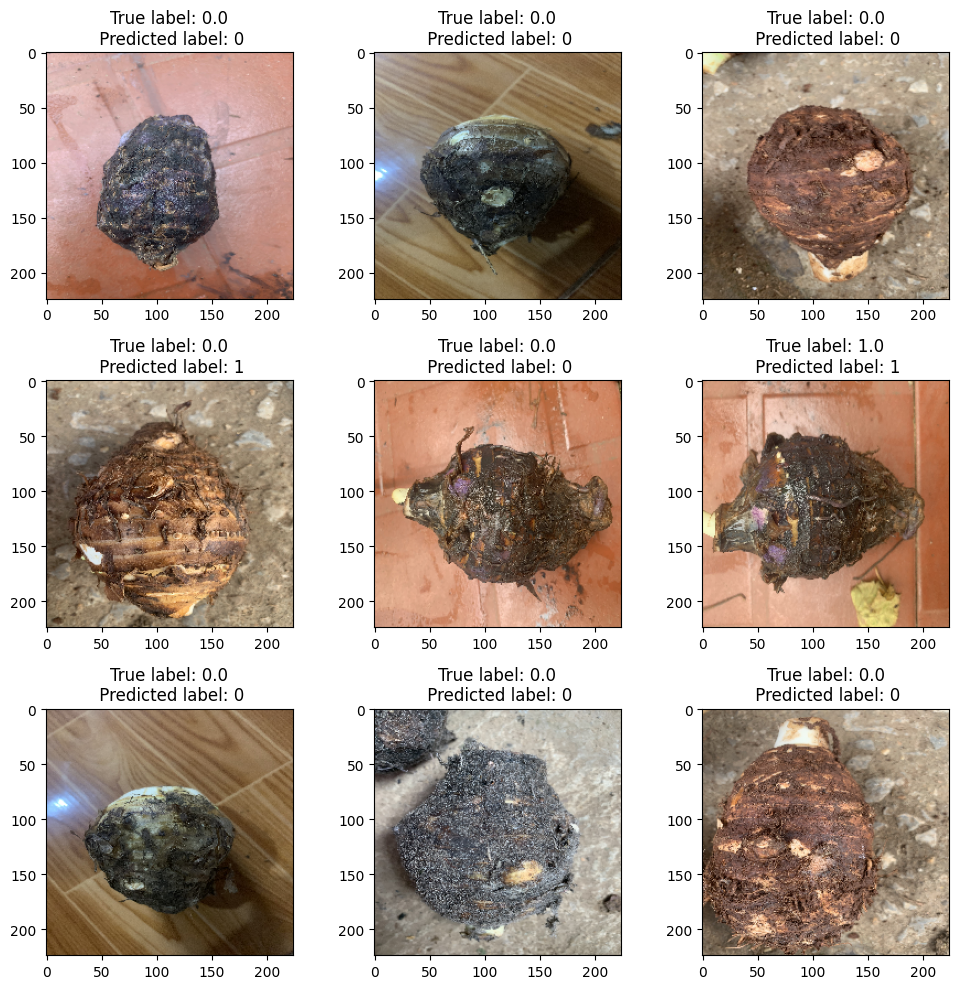

In [60]:
true_labels = []
predicted_labels = []
class_names = test_generator.class_indices.keys()
num_batches = len(test_generator)
for i in range(num_batches):
    x, y = test_generator.next()
    true_labels.extend(y)
    predicted_labels.extend(np.argmax(model.predict(x), axis=-1))

# print(true_labels)
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

plt.figure(figsize=(10, 10))
num_samples_to_display = min(9, len(true_labels))

for i in range(num_samples_to_display):
    plt.subplot(330 + 1 + i)
    plt.imshow(x[i])
    plt.title(f'True label: {true_labels[i]}\n Predicted label: {predicted_labels[i]}')

plt.tight_layout()
plt.show()


# Test 4: Ensemble Learning